In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, OPTICS, DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, ConfusionMatrixDisplay
from sklearn.neighbors import NearestNeighbors
from random import randint
from kneed import KneeLocator
from scipy import stats
from scipy.signal import find_peaks
from pca import pca
import warnings
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from classes import DataParser
import seaborn as sns

# Ignore user warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning, message='RunTimeWarning')

# Set display options
pd.set_option('display.max_columns', None) # Display all columns

# Load The Data

In [69]:
dataparser = DataParser()
data_list = dataparser.load_data()
df = dataparser.load_df(data_list[0])
df.head()

Working Dir: /Users/marco/Documents/MoinCC-AI4metabolomics/01_Clustering


,Chemical_Shift,FA_20231206_2H_yeast_1.3.ser#1,FA_20231206_2H_yeast_1.3.ser#2,FA_20231206_2H_yeast_1.3.ser#3,FA_20231206_2H_yeast_1.3.ser#4,FA_20231206_2H_yeast_1.3.ser#5,FA_20231206_2H_yeast_1.3.ser#6,FA_20231206_2H_yeast_1.3.ser#7,FA_20231206_2H_yeast_1.3.ser#8,FA_20231206_2H_yeast_1.3.ser#9,FA_20231206_2H_yeast_1.3.ser#10,FA_20231206_2H_yeast_1.3.ser#11,FA_20231206_2H_yeast_1.3.ser#12,FA_20231206_2H_yeast_1.3.ser#13,FA_20231206_2H_yeast_1.3.ser#14,FA_20231206_2H_yeast_1.3.ser#15,FA_20231206_2H_yeast_1.3.ser#16,FA_20231206_2H_yeast_1.3.ser#17,FA_20231206_2H_yeast_1.3.ser#18,FA_20231206_2H_yeast_1.3.ser#19,FA_20231206_2H_yeast_1.3.ser#20,FA_20231206_2H_yeast_1.3.ser#21,FA_20231206_2H_yeast_1.3.ser#22,FA_20231206_2H_yeast_1.3.ser#23,FA_20231206_2H_yeast_1.3.ser#24,FA_20231206_2H_yeast_1.3.ser#25,FA_20231206_2H_yeast_1.3.ser#26,FA_20231206_2H_yeast_1.3.ser#27,FA_20231206_2H_yeast_1.3.ser#28,FA_20231206_2H_yeast_1.3.ser#29,FA_20231206_2H_yeast_1.3.ser#30,FA_20231206_2H_yeast_1.3.ser#31,FA_20231206_2H_yeast_1.3.ser#32,FA_20231206_2H_yeast_1.3.ser#33,FA_20231206_2H_yeast_1.3.ser#34,FA_20231206_2H_yeast_1.3.ser#35,FA_20231206_2H_yeast_1.3.ser#36,FA_20231206_2H_yeast_1.3.ser#37,FA_20231206_2H_yeast_1.3.ser#38,FA_20231206_2H_yeast_1.3.ser#39,FA_20231206_2H_yeast_1.3.ser#40,FA_20231206_2H_yeast_1.3.ser#41,FA_20231206_2H_yeast_1.3.ser#42,FA_20231206_2H_yeast_1.3.ser#43,FA_20231206_2H_yeast_1.3.ser#44,FA_20231206_2H_yeast_1.3.ser#45,FA_20231206_2H_yeast_1.3.ser#46,FA_20231206_2H_yeast_1.3.ser#47,FA_20231206_2H_yeast_1.3.ser#48,FA_20231206_2H_yeast_1.3.ser#49,FA_20231206_2H_yeast_1.3.ser#50,FA_20231206_2H_yeast_1.3.ser#51,FA_20231206_2H_yeast_1.3.ser#52,FA_20231206_2H_yeast_1.3.ser#53,FA_20231206_2H_yeast_1.3.ser#54,FA_20231206_2H_yeast_1.3.ser#55,FA_20231206_2H_yeast_1.3.ser#56,FA_20231206_2H_yeast_1.3.ser#57,FA_20231206_2H_yeast_1.3.ser#58,FA_20231206_2H_yeast_1.3.ser#59,FA_20231206_2H_yeast_1.3.ser#60,FA_20231206_2H_yeast_1.3.ser#61,FA_20231206_2H_yeast_1.3.ser#62,FA_20231206_2H_yeast_1.3.ser#63,FA_20231206_2H_yeast_1.3.ser#64,FA_20231206_2H_yeast_1.3.ser#65,FA_20231206_2H_yeast_1.3.ser#66,FA_20231206_2H_yeast_1.3.ser#67,FA_20231206_2H_yeast_1.3.ser#68,FA_20231206_2H_yeast_1.3.ser#69,FA_20231206_2H_yeast_1.3.ser#70,FA_20231206_2H_yeast_1.3.ser#71,FA_20231206_2H_yeast_1.3.ser#72,FA_20231206_2H_yeast_1.3.ser#73,FA_20231206_2H_yeast_1.3.ser#74,FA_20231206_2H_yeast_1.3.ser#75,FA_20231206_2H_yeast_1.3.ser#76,FA_20231206_2H_yeast_1.3.ser#77,FA_20231206_2H_yeast_1.3.ser#78,FA_20231206_2H_yeast_1.3.ser#79,FA_20231206_2H_yeast_1.3.ser#80,FA_20231206_2H_yeast_1.3.ser#81,FA_20231206_2H_yeast_1.3.ser#82,FA_20231206_2H_yeast_1.3.ser#83,FA_20231206_2H_yeast_1.3.ser#84,FA_20231206_2H_yeast_1.3.ser#85,FA_20231206_2H_yeast_1.3.ser#86,FA_20231206_2H_yeast_1.3.ser#87,FA_20231206_2H_yeast_1.3.ser#88,FA_20231206_2H_yeast_1.3.ser#89,FA_20231206_2H_yeast_1.3.ser#90,FA_20231206_2H_yeast_1.3.ser#91,FA_20231206_2H_yeast_1.3.ser#92,FA_20231206_2H_yeast_1.3.ser#93,FA_20231206_2H_yeast_1.3.ser#94,FA_20231206_2H_yeast_1.3.ser#95,FA_20231206_2H_yeast_1.3.ser#96,FA_20231206_2H_yeast_1.3.ser#97,FA_20231206_2H_yeast_1.3.ser#98,FA_20231206_2H_yeast_1.3.ser#99,FA_20231206_2H_yeast_1.3.ser#100
0,-1.10734,-93.3047,-55.7726,21.4429,-3.491090,-284.566,5.07346,182.686,12.15420,-378.133,-93.30900,-216.077,67.7832,306.942,-25.8211,-7.45544,-31.0245,-318.431,-164.964,-155.64800,-80.064,-13.7937,-31.81520,-156.662000,-83.4651,136.037,204.222,-90.4240,116.560,-195.328,-76.02960,-109.895,-26.2691,-134.327,31.7361,105.5010,-417.042,-365.552,209.668,11.7305,-46.5349,-93.5192,143.8980,133.227,-156.632,-238.721,-117.0580,-38.1670,50.72800,82.3421,-48.9461,-142.005,83.8488,270.419,-225.548,-146.973,93.6278,-60.325400,-106.989,-7.30396,-58.1124,-143.361,166.2690,48.1835,17.4044,178.342,22.65500,-239.877,-93.8312,-10.02360,64.7213,-133.135,-337.981,349.102,43.2501,-131.705,173.007,37.5723,-136.5190,181.119,-3.22675,-110.1500,-201.4350,-93.787,13.43580,116.369,-117.46800,120.300,-339.136,

# Plot the Data

,Chemical_Shift,FA_20231206_2H_yeast_1.3.ser#1,FA_20231206_2H_yeast_1.3.ser#2,FA_20231206_2H_yeast_1.3.ser#3,FA_20231206_2H_yeast_1.3.ser#4,FA_20231206_2H_yeast_1.3.ser#5,FA_20231206_2H_yeast_1.3.ser#6,FA_20231206_2H_yeast_1.3.ser#7,FA_20231206_2H_yeast_1.3.ser#8,FA_20231206_2H_yeast_1.3.ser#9,FA_20231206_2H_yeast_1.3.ser#10,FA_20231206_2H_yeast_1.3.ser#11,FA_20231206_2H_yeast_1.3.ser#12,FA_20231206_2H_yeast_1.3.ser#13,FA_20231206_2H_yeast_1.3.ser#14,FA_20231206_2H_yeast_1.3.ser#15,FA_20231206_2H_yeast_1.3.ser#16,FA_20231206_2H_yeast_1.3.ser#17,FA_20231206_2H_yeast_1.3.ser#18,FA_20231206_2H_yeast_1.3.ser#19,FA_20231206_2H_yeast_1.3.ser#20,FA_20231206_2H_yeast_1.3.ser#21,FA_20231206_2H_yeast_1.3.ser#22,FA_20231206_2H_yeast_1.3.ser#23,FA_20231206_2H_yeast_1.3.ser#24,FA_20231206_2H_yeast_1.3.ser#25,FA_20231206_2H_yeast_1.3.ser#26,FA_20231206_2H_yeast_1.3.ser#27,FA_20231206_2H_yeast_1.3.ser#28,FA_20231206_2H_yeast_1.3.ser#29,FA_20231206_2H_yeast_1.3.ser#30,FA_20231206_2H_yeast_1.3.ser#31,FA_20231206_2H_yeast_1.3.ser#32,FA_20231206_2H_yeast_1.3.ser#33,FA_20231206_2H_yeast_1.3.ser#34,FA_20231206_2H_yeast_1.3.ser#35,FA_20231206_2H_yeast_1.3.ser#36,FA_20231206_2H_yeast_1.3.ser#37,FA_20231206_2H_yeast_1.3.ser#38,FA_20231206_2H_yeast_1.3.ser#39,FA_20231206_2H_yeast_1.3.ser#40,FA_20231206_2H_yeast_1.3.ser#41,FA_20231206_2H_yeast_1.3.ser#42,FA_20231206_2H_yeast_1.3.ser#43,FA_20231206_2H_yeast_1.3.ser#44,FA_20231206_2H_yeast_1.3.ser#45,FA_20231206_2H_yeast_1.3.ser#46,FA_20231206_2H_yeast_1.3.ser#47,FA_20231206_2H_yeast_1.3.ser#48,FA_20231206_2H_yeast_1.3.ser#49,FA_20231206_2H_yeast_1.3.ser#50,FA_20231206_2H_yeast_1.3.ser#51,FA_20231206_2H_yeast_1.3.ser#52,FA_20231206_2H_yeast_1.3.ser#53,FA_20231206_2H_yeast_1.3.ser#54,FA_20231206_2H_yeast_1.3.ser#55,FA_20231206_2H_yeast_1.3.ser#56,FA_20231206_2H_yeast_1.3.ser#57,FA_20231206_2H_yeast_1.3.ser#58,FA_20231206_2H_yeast_1.3.ser#59,FA_20231206_2H_yeast_1.3.ser#60,FA_20231206_2H_yeast_1.3.ser#61,FA_20231206_2H_yeast_1.3.ser#62,FA_20231206_2H_yeast_1.3.ser#63,FA_20231206_2H_yeast_1.3.ser#64,FA_20231206_2H_yeast_1.3.ser#65,FA_20231206_2H_yeast_1.3.ser#66,FA_20231206_2H_yeast_1.3.ser#67,FA_20231206_2H_yeast_1.3.ser#68,FA_20231206_2H_yeast_1.3.ser#69,FA_20231206_2H_yeast_1.3.ser#70,FA_20231206_2H_yeast_1.3.ser#71,FA_20231206_2H_yeast_1.3.ser#72,FA_20231206_2H_yeast_1.3.ser#73,FA_20231206_2H_yeast_1.3.ser#74,FA_20231206_2H_yeast_1.3.ser#75,FA_20231206_2H_yeast_1.3.ser#76,FA_20231206_2H_yeast_1.3.ser#77,FA_20231206_2H_yeast_1.3.ser#78,FA_20231206_2H_yeast_1.3.ser#79,FA_20231206_2H_yeast_1.3.ser#80,FA_20231206_2H_yeast_1.3.ser#81,FA_20231206_2H_yeast_1.3.ser#82,FA_20231206_2H_yeast_1.3.ser#83,FA_20231206_2H_yeast_1.3.ser#84,FA_20231206_2H_yeast_1.3.ser#85,FA_20231206_2H_yeast_1.3.ser#86,FA_20231206_2H_yeast_1.3.ser#87,FA_20231206_2H_yeast_1.3.ser#88,FA_20231206_2H_yeast_1.3.ser#89,FA_20231206_2H_yeast_1.3.ser#90,FA_20231206_2H_yeast_1.3.ser#91,FA_20231206_2H_yeast_1.3.ser#92,FA_20231206_2H_yeast_1.3.ser#93,FA_20231206_2H_yeast_1.3.ser#94,FA_20231206_2H_yeast_1.3.ser#95,FA_20231206_2H_yeast_1.3.ser#96,FA_20231206_2H_yeast_1.3.ser#97,FA_20231206_2H_yeast_1.3.ser#98,FA_20231206_2H_yeast_1.3.ser#99,FA_20231206_2H_yeast_1.3.ser#100,sum
0,-1.10734,-93.3047,-55.7726,21.4429,-3.491090,-284.566,5.07346,182.686,12.15420,-378.133,-93.30900,-216.077,67.7832,306.942,-25.8211,-7.45544,-31.0245,-318.431,-164.964,-155.64800,-80.064,-13.7937,-31.81520,-156.662000,-83.4651,136.037,204.222,-90.4240,116.560,-195.328,-76.02960,-109.895,-26.2691,-134.327,31.7361,105.5010,-417.042,-365.552,209.668,11.7305,-46.5349,-93.5192,143.8980,133.227,-156.632,-238.721,-117.0580,-38.1670,50.72800,82.3421,-48.9461,-142.005,83.8488,270.419,-225.548,-146.973,93.6278,-60.325400,-106.989,-7.30396,-58.1124,-143.361,166.2690,48.1835,17.4044,178.342,22.65500,-239.877,-93.8312,-10.02360,64.7213,-133.135,-337.981,349.102,43.2501,-131.705,173.007,37.5723,-136.5190,181.119,-3.22675,-110.1500,-201.4350,-93.787,13.43580,116.369,-117.46800,120.300,-339.

,Chemical_Shift,sum
0,-1.10734,-3605.281780
1,-1.10327,-3582.749218
2,-1.09919,-3564.875140
3,-1.09512,-3529.826121
4,-1.09105,-3489.781667


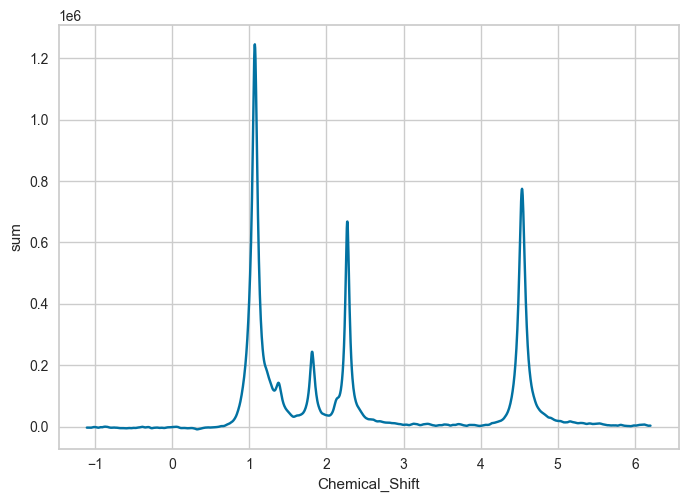

In [70]:
df['sum'] = df.iloc[:,1:].sum(axis=1)
display(df.head())

# just select ppm and sum for the df
df = df.iloc[:,[0,-1]]
display(df.head())

# plot the data
x = df.iloc[:,0]
y = df.loc[:,'sum']

sns.lineplot(x=x, y=y)
plt.show()

# Scaling

In [71]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe().round(2)

,Chemical_Shift,sum
count,1796.00,1796.00
mean,0.50,0.06
std,0.29,0.12
min,0.00,0.00
25%,0.25,0.01
50%,0.50,0.01
75%,0.75,0.04
max,1.00,1.00


In [72]:
def plot_cluster_assignments(df, model, pca=False, sample_frac=0.1, height=2.5, alpha=0.8)->None:
    """
    Plot cluster assignments of the data using pairplot.

    Parameters:
        df (DataFrame): The input dataframe containing the data.
        model: The clustering model used for assigning clusters.
        pca (bool, optional): Indicates whether the data is from PCA. Defaults to False.
        sample_frac (float, optional): The fraction of samples to be used for plotting. Defaults to 0.1.
        height (float, optional): The height of the pairplot. Defaults to 2.5.
        alpha (float, optional): The transparency of data points in the plot. Defaults to 0.8.

    Returns:
        None
    """
        
    df['cluster_assignments'] = model.labels_

    # if pca != True:
    #     selected_features = [
    #         'RA_xacc', 'RA_yacc', 'RA_zacc', 
    #         'RA_xgyro', 'RA_ygyro', 'RA_zgyro',
    #         'RA_xmag', 'RA_ymag', 'RA_zmag',
    #         'cluster_assignments']
    # else:
    selected_features = df.columns # For PCA data

    # Create a custom color palette
    palette = sns.color_palette('hls', df['cluster_assignments'].nunique())
    
    # Create a mapping from cluster assignments to colors
    cluster_colors = {label: color for label, color in zip(df['cluster_assignments'].unique(), palette)}
    
    # Assign a color to -1 (noise points)
    cluster_colors[-1] = (0, 0, 0)

    x = df.iloc[:,0]
    y = df.iloc[:,1]
    
    sns.lineplot(x=x, y=y, hue=model.labels_, palette=cluster_colors)
    # sns.pairplot(df[selected_features].sample(frac=sample_frac, random_state=42), hue='cluster_assignments', palette=cluster_colors, height=height, plot_kws={'alpha': alpha})
    plt.show()
    
    df.drop(['cluster_assignments'], inplace=True, axis=1)

    return None

# 

# OPTICS

Number of Cluster (with noise): 8
{0, 1, 2, 3, 4, 5, 6, -1}


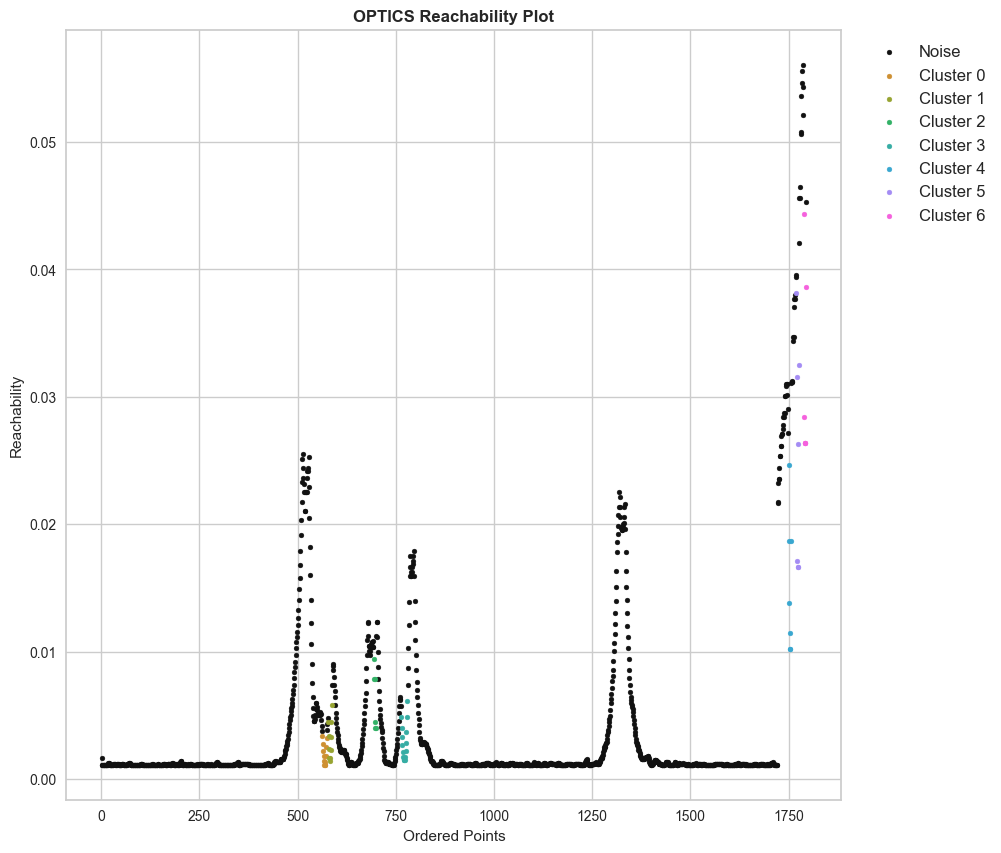

In [73]:
def plot_reachability(model)->None:
    """
    Plot the reachability plot of an OPTICS clustering model.

    Parameters:
        model (OPTICS): Fitted OPTICS clustering model.
    """
        
    # Reachability Plot
    reachability = model.reachability_[model.ordering_]
    labels = model.labels_[model.ordering_]
    colors = sns.color_palette('husl', len(set(model.labels_)))

    plt.figure(figsize=(10, 10))

    for i, klass in enumerate(np.unique(labels)):
        if klass == -1: # Set noise to color black
            color = 'k'
            label = 'Noise'
        else:
            color = colors[i]
            label = f'Cluster {klass}'
            i+=1
        mask = labels == klass
        plt.scatter(np.arange(len(reachability))[mask], reachability[mask], marker='o', color=color, label=label, s=12)

    plt.title('OPTICS Reachability Plot', fontsize=12, fontweight='bold')
    plt.xlabel('Ordered Points')
    plt.ylabel('Reachability')

    # Place the legend outside of the figure
    plt.legend(fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.show()

    return None

# Applying Optics
metric = 'euclidean'
optics_sc = OPTICS(min_samples=2*df_scaled.ndim, xi=0.15, min_cluster_size=df_scaled.shape[1], metric=metric)
optics_sc.fit(df_scaled) 

labels = optics_sc.labels_

# Number of Cluster (without noise)
n_clusters = len(set(labels))
print(f'Number of Cluster (with noise): {n_clusters}')
print(set(labels))

plot_reachability(model=optics_sc)

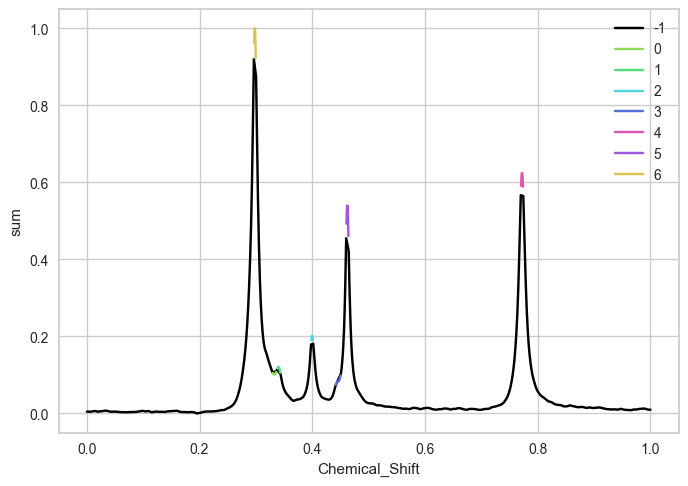

In [74]:
plot_cluster_assignments(df_scaled, optics_sc, sample_frac=1.0)

In [75]:
df['cluster_assignments'] = optics_sc.labels_

# just select df which has cluster_assignments not -1
df = df[df['cluster_assignments'] != -1]
df_cluster_group = df.groupby(by='cluster_assignments').mean().reset_index()
df_cluster_group

,cluster_assignments,Chemical_Shift,sum
0,0,1.325993,1.198449e+05
1,1,1.383007,1.368179e+05
2,2,1.814695,2.369078e+05
3,3,2.152715,9.615962e+04
4,4,4.537176,7.549961e+05
5,5,2.272854,6.317515e+05
6,6,1.073495,1.210123e+06
